In [7]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train = True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [9]:
len(cifar10)

50000

In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x2006BD877F0>, 1, 'automobile')

TypeError: Invalid shape (3, 32, 32) for image data

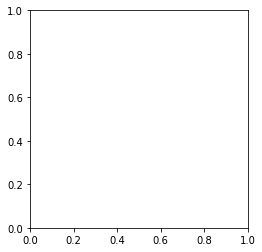

In [33]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [34]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [35]:
tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())

In [36]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

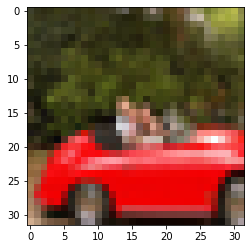

In [37]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [38]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [39]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [40]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [41]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                            (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                            (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

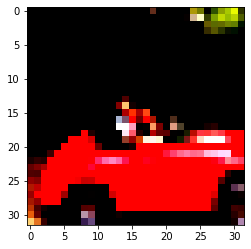

In [42]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show

In [43]:
label_map = {0: 0 , 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
         for img, label in transformed_cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
             for img, label in cifar10_val
             if label in [0,2]]

In [44]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(
            nn.Linear(3072, 512,),
            nn.Tanh(),
            nn.Linear(512, n_out,))

In [45]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [46]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [47]:
softmax(x).sum()

tensor(1.)

In [48]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [49]:
softmax = nn.Softmax(dim=0)
x = torch.tensor([[1.0, 2.0, 3.0],
                 [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

In [50]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


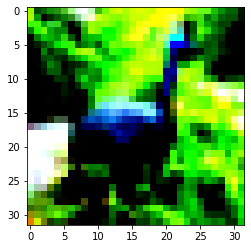

In [51]:
img, _ = cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [52]:
img_batch = img.view(-1).unsqueeze(0)

In [53]:
out = model(img_batch)
out

tensor([[0.5570, 0.4430]], grad_fn=<SoftmaxBackward0>)

In [54]:
_, index = torch.max(out, dim=1)
index

tensor([0])

In [72]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))
loss = nn.NLLLoss()

In [35]:
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6357, grad_fn=<NllLossBackward0>)

In [41]:
import torch
import torch.nn as nn
model = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512,2),
                     nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 4.500569
Epoch: 1, Loss: 6.599077
Epoch: 2, Loss: 14.365779
Epoch: 3, Loss: 6.454042
Epoch: 4, Loss: 8.454642
Epoch: 5, Loss: 8.093604
Epoch: 6, Loss: 10.932810
Epoch: 7, Loss: 5.069043
Epoch: 8, Loss: 11.885922
Epoch: 9, Loss: 5.853361
Epoch: 10, Loss: 12.895825
Epoch: 11, Loss: 9.483115
Epoch: 12, Loss: 8.191728
Epoch: 13, Loss: 0.740299
Epoch: 14, Loss: 9.976281
Epoch: 15, Loss: 4.719825
Epoch: 16, Loss: 11.917905
Epoch: 17, Loss: 3.154021
Epoch: 18, Loss: 6.240066
Epoch: 19, Loss: 3.549754
Epoch: 20, Loss: 11.985615
Epoch: 21, Loss: 14.139756
Epoch: 22, Loss: 8.190253
Epoch: 23, Loss: 2.379422
Epoch: 24, Loss: 3.209767
Epoch: 25, Loss: 6.760672
Epoch: 26, Loss: 4.377545
Epoch: 27, Loss: 3.784705
Epoch: 28, Loss: 16.269840
Epoch: 29, Loss: 13.960799
Epoch: 30, Loss: 10.586180
Epoch: 31, Loss: 8.443891
Epoch: 32, Loss: 11.003699
Epoch: 33, Loss: 2.748264
Epoch: 34, Loss: 12.971228
Epoch: 35, Loss: 9.464051
Epoch: 36, Loss: 14.117583
Epoch: 37, Loss: 4.700507
Epoch: 38

In [42]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

In [44]:
torch.save(model, 'Save_File_FM.pth')

In [91]:
import torch
import torch.nn as nn
model = torch.load('Save_File_FM.pth')
train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle= True)

In [85]:
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle= True)
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        

Epoch: 0, Loss: 0.502599
Epoch: 1, Loss: 0.509853
Epoch: 2, Loss: 0.431800
Epoch: 3, Loss: 0.489269
Epoch: 4, Loss: 0.313390
Epoch: 5, Loss: 0.410486
Epoch: 6, Loss: 0.410222
Epoch: 7, Loss: 0.325822
Epoch: 8, Loss: 0.496187
Epoch: 9, Loss: 0.662401
Epoch: 10, Loss: 0.332874
Epoch: 11, Loss: 0.272162
Epoch: 12, Loss: 0.655266
Epoch: 13, Loss: 0.364622
Epoch: 14, Loss: 0.315125
Epoch: 15, Loss: 0.527363
Epoch: 16, Loss: 0.488687
Epoch: 17, Loss: 0.455992
Epoch: 18, Loss: 0.270281
Epoch: 19, Loss: 0.388717
Epoch: 20, Loss: 0.153037
Epoch: 21, Loss: 0.289861
Epoch: 22, Loss: 0.307466
Epoch: 23, Loss: 0.439243
Epoch: 24, Loss: 0.179587
Epoch: 25, Loss: 0.254773
Epoch: 26, Loss: 0.300128
Epoch: 27, Loss: 0.352430
Epoch: 28, Loss: 0.254564
Epoch: 29, Loss: 0.235600
Epoch: 30, Loss: 0.156204
Epoch: 31, Loss: 0.211157
Epoch: 32, Loss: 0.150680
Epoch: 33, Loss: 0.395550
Epoch: 34, Loss: 0.136442
Epoch: 35, Loss: 0.157952
Epoch: 36, Loss: 0.321628
Epoch: 37, Loss: 0.483971
Epoch: 38, Loss: 0.127

In [86]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size, shuffle = False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim =1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct / total))

Accuracy: 0.814500


In [78]:
torch.save(model, 'Save_File_FM.pth')

In [83]:
model = nn.Sequential(nn.Linear(3072, 1024),
                    nn.Tanh(),
                    nn.Linear(1024, 512),
                    nn.Tanh(),
                    nn.Linear(512, 128),
                    nn.Tanh(),
                    nn.Linear(128,2),
                    nn.LogSoftmax(dim=1))

In [79]:
model = nn.Sequential(nn.Linear(3072, 1024),
                    nn.Tanh(),
                    nn.Linear(1024, 512),
                    nn.Tanh(),
                    nn.Linear(512, 128),
                    nn.Tanh(),
                    nn.Linear(128,2),)
loss_fn = nn.CrossEntropyLoss()

In [90]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [92]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [115]:
Linear_model = model

In [123]:
x =torch.tensor()
x.shape

torch.Size([4])

In [124]:
Linear_model(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x4 and 3072x512)